In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sympy.vector import CoordSys3D, Del
from sympy import randMatrix
from sympy import *
from sympy.utilities.lambdify import implemented_function
from sympy import lambdify
from scipy.optimize import fsolve
from scipy.optimize import minimize
from scipy.optimize import root
import matplotlib.pyplot as plt

2023-12-08 22:13:35.858331: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
def crit_points_quad(x_vals, eps = 1e-6):
    # solutions = []
    # zeros = []
    # is_minimums = []
    x_minima = []
    f_minima = []

    X = randMatrix(3, 1,  min = -10, max = 10)
    Y = randMatrix(3, 1, min = -10, max = 10)
    W0 = Matrix(symarray('w0', (3, 3)))
    W1 = Matrix(symarray('w1', (3, 3)))

    component = (W1 * ((W0 * X ).applyfunc(lambda x: x**2)))
    #loss = (component - Y).norm() * (component - Y).norm()
    loss = (component - Y).dot(component - Y)
    vars = [W0[i,j] for i in range(3) for j in range(3)] + [W1[i,j] for i in range(3) for j in range(3)]

    gradient = derive_by_array(loss, vars)
    loss_lambdified = lambdify([vars], loss, "scipy")

    f = lambdify([vars], gradient, "scipy")

    for x in x_vals:

        minimum_object = minimize(loss_lambdified, x, jac = f, method='Newton-CG', tol = 1e-10, options = {'xtol':0.0000001})
        x_minimum = minimum_object['x']

        if minimum_object['success'] == True:
            f_minimum = minimum_object['fun']

            if len(x_minima) == 0 or (not (np.any(np.all(np.isclose(x_minimum, np.array(x_minima), atol = 20), axis=1))) and not (np.any(np.isclose(f_minimum, np.array(f_minima), atol = 20), axis = 0))):
                x_minima.append(x_minimum)

                f_minima.append(f_minimum)

    return x_minima, f_minima


In [8]:
x_minima = []
f_minima = []

x_vals = np.linspace(-50, 50, 25)

for i in range(100):
    print(i)
    x_minimum, f_minimum = crit_points_quad(np.repeat(x_vals[:, np.newaxis], 3*3 + 3*3, axis=1))

    x_minima.append(x_minimum)
    f_minima.append(f_minimum)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [17]:
def crit_points_relu(x_vals, eps = 1e-6):
    # solutions = []
    # zeros = []
    # is_minimums = []
    x_minima = []
    f_minima = []

    X = randMatrix(3, 1,  min = -10, max = 10)
    Y = randMatrix(3, 1, min = -10, max = 10)
    W0 = Matrix(symarray('w0', (3, 3)))
    W1 = Matrix(symarray('w1', (3, 3)))

    component = (W1 * ((W0 * X ).applyfunc(lambda x: np.max(x, 0))))
    #loss = (component - Y).norm() * (component - Y).norm()
    loss = (component - Y).dot(component - Y)
    vars = [W0[i,j] for i in range(3) for j in range(3)] + [W1[i,j] for i in range(3) for j in range(3)]

    gradient = derive_by_array(loss, vars)
    loss_lambdified = lambdify([vars], loss, "scipy")

    f = lambdify([vars], gradient, "scipy")

    for x in x_vals:

        minimum_object = minimize(loss_lambdified, x, jac = f, method='Newton-CG', tol = 1e-10, options = {'xtol':0.0000001})
        x_minimum = minimum_object['x']

        if minimum_object['success'] == True:
            f_minimum = minimum_object['fun']

            if len(x_minima) == 0 or (not (np.any(np.all(np.isclose(x_minimum, np.array(x_minima), atol = 20), axis=1))) and not (np.any(np.isclose(f_minimum, np.array(f_minima), atol = 20), axis = 0))):
                x_minima.append(x_minimum)
                f_minima.append(f_minimum)

    #res = minimize(loss_lambdified, [1 for i in range(len(vars))], method='BFGS')
    return x_minima, f_minima


In [19]:
x_minima_relu = []
f_minima_relu = []

x_vals = np.linspace(-50, 50, 25)

for i in range(100):
    print(i)
    x_minimum, f_minimum = crit_points_relu(np.repeat(x_vals[:, np.newaxis], 3*3 + 3*3, axis=1))
    # roots.append(solution)
    # at_roots.append(d)
    # minima.append(x)
    # at_minima.append(fun)
    x_minima_relu.append(x_minimum)
    f_minima_relu.append(f_minimum)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


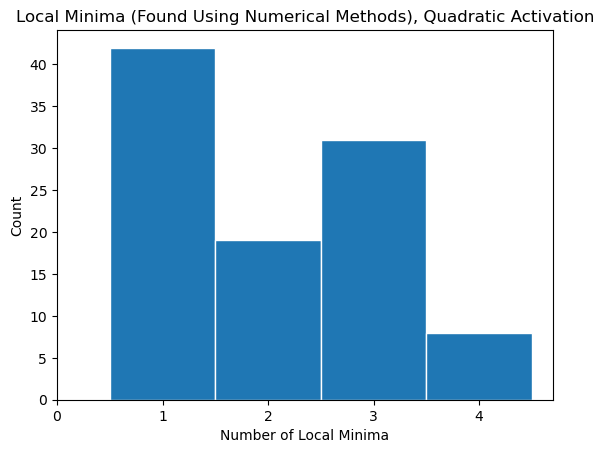

In [16]:
plt.hist([len(i) for i in x_minima], [0.5, 1.5, 2.5, 3.5, 4.5], edgecolor = "white")
plt.xlabel("Number of Local Minima")
plt.ylabel("Count")
plt.title("Local Minima (Found Using Numerical Methods), Quadratic Activation")
plt.xticks(np.arange(0, 5, step=1))
plt.savefig("minima.png")

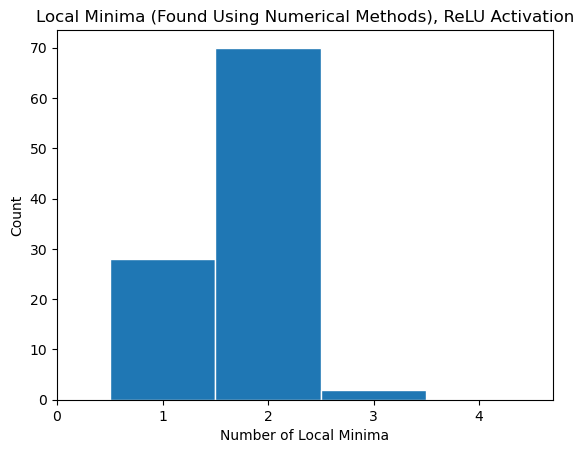

In [21]:
plt.hist([len(i) for i in x_minima_relu], [0.5, 1.5, 2.5, 3.5, 4.5], edgecolor = "white")
plt.xlabel("Number of Local Minima")
plt.ylabel("Count")
plt.title("Local Minima (Found Using Numerical Methods), ReLU Activation")
plt.xticks(np.arange(0, 5, step=1))
plt.savefig("minima_relu.png")


In [487]:
def crit_points_lin(x_vals, eps = 1e-6):
    x_minima = []
    f_minima = []

    X = randMatrix(3, 1,  min = -10, max = 10)
    Y = randMatrix(3, 1, min = -10, max = 10)
    W0 = Matrix(symarray('w0', (3, 3)))
    W1 = Matrix(symarray('w1', (3, 3)))

    component = W1 * W0 * X
    loss = (component - Y).dot(component - Y)
    vars = [W0[i,j] for i in range(3) for j in range(3)] + [W1[i,j] for i in range(3) for j in range(3)]

    gradient = derive_by_array(loss, vars)
    loss_lambdified = lambdify([vars], loss, "scipy")

    f = lambdify([vars], gradient, "scipy")

    for x in x_vals:

        minimum_object = minimize(loss_lambdified, x, jac = f, method='Newton-CG', tol = 1e-10, options = {'xtol':0.00000001})
        x_minimum = minimum_object['x']

        if minimum_object['success'] == True:
            f_minimum = minimum_object['fun']

            if len(x_minima) == 0 or (not (np.any(np.all(np.isclose(x_minimum, np.array(x_minima), atol = 20), axis=1))) and not (np.any(np.isclose(f_minimum, np.array(f_minima), atol = 20), axis = 0))):
                x_minima.append(x_minimum)
                f_minima.append(f_minimum)

    #res = minimize(loss_lambdified, [1 for i in range(len(vars))], method='BFGS')
    return x_minima, f_minima

x_minima_lin = []
f_minima_lin = []

x_vals = np.linspace(-50, 50, 25)

for i in range(250):
    print(i)
    x_minimum, f_minimum = crit_points_lin(np.repeat(x_vals[:, np.newaxis], len(vars), axis=1))

    x_minima_lin.append(x_minimum)
    f_minima_lin.append(f_minimum)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


In [371]:
X = randMatrix(3, 1,  min = -10, max = 10)
Y = randMatrix(3, 1, min = -10, max = 10)
W0 = Matrix(symarray('w0', (3, 3)))
W1 = Matrix(symarray('w1', (3, 3)))

component = W1 * W0 * X
loss = (component - Y).dot(component - Y)
vars = [W0[i,j] for i in range(3) for j in range(3)] + [W1[i,j] for i in range(3) for j in range(3)]

gradient = derive_by_array(loss, vars)
loss_lambdified = lambdify([vars], loss, "scipy")

f = lambdify([vars], gradient, "scipy")

minimize(loss_lambdified, [-50 for i in range(len(vars))], method='BFGS')

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 2.1056637579039277e-05
        x: [-1.338e+01 -3.143e+01 ... -3.023e+01 -3.369e+01]
      nit: 16
      jac: [ 3.379e+00  4.735e+00 ... -1.555e-01  3.148e-01]
 hess_inv: [[ 7.585e-01 -3.208e-01 ...  5.532e-03 -1.949e-03]
            [-3.208e-01  6.030e-01 ...  1.869e-02 -2.783e-03]
            ...
            [ 5.532e-03  1.869e-02 ...  1.019e-01  1.060e-01]
            [-1.949e-03 -2.783e-03 ...  1.060e-01  1.407e-01]]
     nfev: 1550
     njev: 81

In [485]:
f_minima_lin

[[0.0002379290382638874, 126.0],
 [0.19912697901045304, 110.0],
 [95.99999339204751, 2.1738023727478772e-13],
 [1.494515699629203e-07],
 [120.56316255136215, 0.4240773313110452]]

In [445]:
x_minimum = x_minima_lin[0][1]
tester = [x_minima_lin[0][0]]

In [446]:
np.array(x_minima_lin[0]).shape

(15, 18)

In [436]:
print(np.any(np.all(np.isclose(x_minimum, np.array(x_minima_lin[0]), atol = 10))))

False


In [440]:
print(np.all(np.isclose(x_minimum, x_minima_lin[0], atol = 10), axis = 1))

[ True  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False]


In [408]:
print(np.any(np.all(np.isclose(x_minima[0][0], x_minima, atol = 10, rtol = 10), axis = 1)))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (250,) + inhomogeneous part.

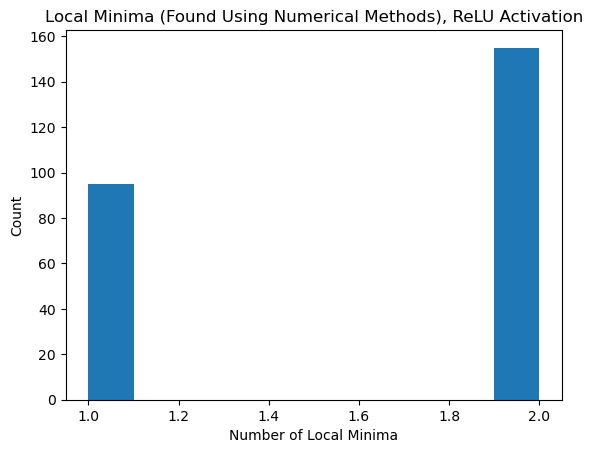

In [488]:
plt.hist([len(i) for i in x_minima_lin])
plt.xlabel("Number of Local Minima")
plt.ylabel("Count")
plt.title("Local Minima (Found Using Numerical Methods), Linear Activation")
plt.savefig("minima_linear.png")